<a href="https://colab.research.google.com/github/Dinith-Thejana/Assignment_2B/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploads = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/cleaned_data.csv')
df.head(10)

,SCATS Number,Location,Date,Interval,Volume,Time
0,2200,UNION_RD N of MAROONDAH_HWY,2006-10-01,V00,25,00:00
1,2200,UNION_RD N of MAROONDAH_HWY,2006-10-02,V00,4,00:00
2,2200,UNION_RD N of MAROONDAH_HWY,2006-10-03,V00,7,00:00
3,2200,UNION_RD N of MAROONDAH_HWY,2006-10-04,V00,3,00:00
4,2200,UNION_RD N of MAROONDAH_HWY,2006-10-05,V00,8,00:00
5,2200,UNION_RD N of MAROONDAH_HWY,2006-10-06,V00,8,00:00
6,2200,UNION_RD N of MAROONDAH_HWY,2006-10-07,V00,17,00:00
7,2200,UNION_RD N of MAROONDAH_HWY,2006-10-08,V00,39,00:00
8,2200,UNION_RD N of MAROONDAH_HWY,2006-10-09,V00,2,00:00
9,2200,UNION_RD N of MAROONDAH_HWY,2006-10-10,V00,5,00:00


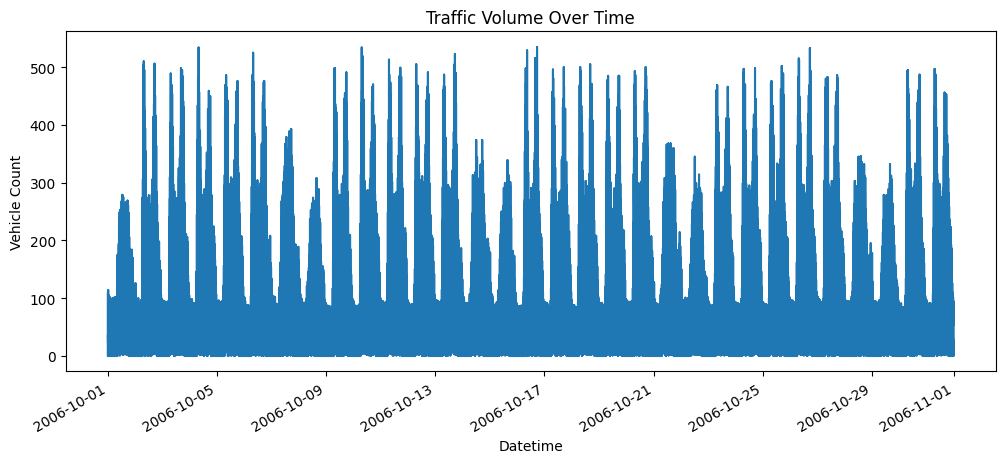

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv('/content/cleaned_data.csv')

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.sort_values('Datetime')

# Set datetime as index
df.set_index('Datetime', inplace=True)

# Plot to visually inspect
df['Volume'].plot(figsize=(12,5), title="Traffic Volume Over Time")
plt.ylabel("Vehicle Count")
plt.show()


In [5]:
# Only use the volume column for prediction
data = df[['Volume']].values

# Normalize values between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Convert to sequences (X, y) format
def create_sequences(data, window_size=24):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 24  # e.g., use last 24 time steps (6 hours if 15-min intervals)
X, y = create_sequences(scaled_data, window_size)

# Train/test split (80/20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [6]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 69s 11ms/step - loss: 0.0096 - val_loss: 0.0115
Epoch 2/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - loss: 0.0092 - val_loss: 0.0117
Epoch 3/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - loss: 0.0091 - val_loss: 0.0115
Epoch 4/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 71s 11ms/step - loss: 0.0091 - val_loss: 0.0115
Epoch 5/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 77s 11ms/step - loss: 0.0091 - val_loss: 0.0117
Epoch 6/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - loss: 0.0090 - val_loss: 0.0115
Epoch 7/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - loss: 0.0091 - val_loss: 0.0115
Epoch 8/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - loss: 0.0090 - val_loss: 0.0114
Epoch 9/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - loss: 0.0090 - val_loss: 0.0114
Epoch 10/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - loss: 0.0090 - val_loss: 0.0114
Epoch 11/20
6227/6227 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - loss: 0.0090 - val_loss: 0.0115
Epoch 12

1730/1730 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


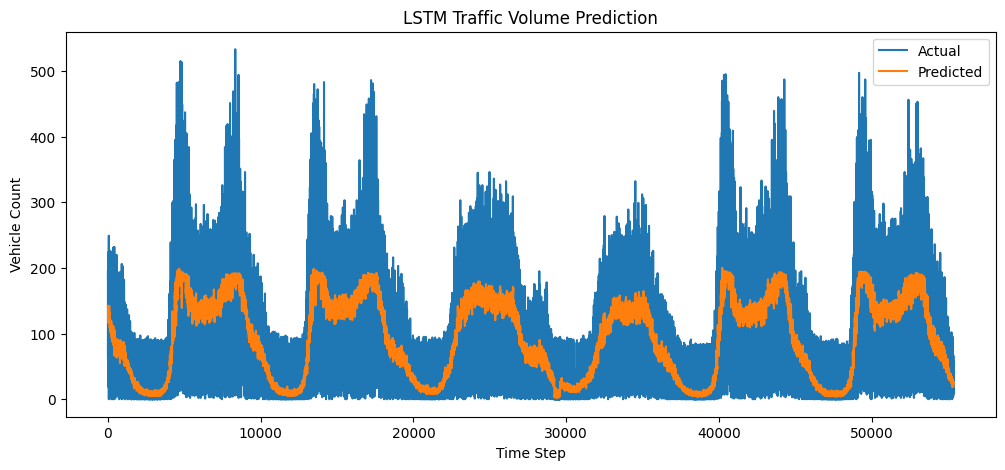

In [7]:
# Predict
predictions = model.predict(X_test)
predicted_volumes = scaler.inverse_transform(predictions)
actual_volumes = scaler.inverse_transform(y_test)

# Plot actual vs predicted
plt.figure(figsize=(12,5))
plt.plot(actual_volumes, label='Actual')
plt.plot(predicted_volumes, label='Predicted')
plt.title("LSTM Traffic Volume Prediction")
plt.xlabel("Time Step")
plt.ylabel("Vehicle Count")
plt.legend()
plt.show()


In [8]:
# Save model if needed
model.save("lstm_traffic_model.h5")
